# 6.2 Exploring Relationships - Trial 2

This script contains the following:
1. Importing Visualization Libraries and Data
2. Data Cleaning: (
    a) new column: 'status_id'
    b) new column: 'new build'
3. Exploring Relationships: correlations, scatterplots, pair plots, categorical plots
4. Adjusted dataframe to remove high outliers for better visualization
5. Export new dataframe 

## Import visualization libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to 
# "call" them specifically.

%matplotlib inline

In [3]:
# define path
path = r'/Users/nancykray/Desktop/Real Estate Project'

In [4]:
# import data

df = pd.read_pickle(os.path.join(path,'Prepared Data', 'df_clean7.pkl'))

## 2. Data Cleaning/checks

In [5]:
df.shape

(2213729, 13)

In [6]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date',
       'Price category'],
      dtype='object')

In [7]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Middle price
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Middle price
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price


### CHECK MISSING VALUES

In [8]:
# Check for missing values

df.isnull().sum() # No missing values!

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
Price category    0
dtype: int64

### CHECK FOR DUPLICATES

In [9]:
# Find duplicates

df_dups = df[df.duplicated()]

In [10]:
df_dups.shape # No duplicates!

(0, 13)

### MIXED DATA TYPES CHECK:

In [11]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# ok, since we changed the NaNs to 0 in the last dataset, it is showing up as mixed data.  df

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_4641/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_4641/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_4641/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_4641/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders

prev_sold_date


/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_4641/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)


In [11]:
df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
Price category     object
dtype: object

In [12]:
#change 'prev_sold_date' to string
df['prev_sold_date'] = df ['prev_sold_date'].astype('str')

In [13]:
#re-check that changes have been made to datatype

for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# all looks good now

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_10977/2041796189.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_10977/2041796189.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_10977/2041796189.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_10977/2041796189.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/fol

## 3. Exploring Relationships
       Clarifying Quesions: 
    
       What geographic areas have most/least sold houses? (cities/states/zip codes)
       What areas have houses with highest?lowest costs?
       When have most houses been sold/bought?  Is there a seasonal trend?  Does this vary across regions?
       Have the market trends changed over time?
       
       Does size affect the market? Does bigger acre_lot or house_size impact selling?
       Do multi-family homes/larger complexes make up more of the market in cities vs rural areas?  
       Do single family homes sell more in rural areas?
       
       Do certain Brokers sell more houses?
       Do new builds sell more than previous sold houses?
       Do number of baths (i.e: 2+ baths) sell more than homes with only 1 bath?
       Do number of bedrooms influence houses sold?
       

In [11]:
# Create a correlation matrix using pandas

df.corr()

ValueError: could not convert string to float: 'for_sale'


### a) Create a 'status_id' column:
#### this is a newly derived column for 'status' to represent the status and interpret into a visualization
##### 1='for_sale'
##### 2='ready_to_build' 
##### 3='sold'

In [14]:
# create 'status_id' column

def status_id (row):
    
    if row['status'] =='for_sale':
      return 1
    elif row ['status'] == 'ready_to_build':
         return 2
    elif row ['status'] == 'sold':
        return 3

In [15]:
# now that the function is defined, lets use it

df['status_id'] = df.apply(status_id, axis=1)

In [16]:
# run the value_counts function to check the values in the new column

df['status_id'].value_counts(dropna = False)

status_id
1    1381789
3     807166
2      24774
Name: count, dtype: int64

##### most homes are for_sale (1), then 'read_to_build', with least amount 'sold' (3)

In [17]:
df.head() #see the new column at the end

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category,status_id
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Middle price,1
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price,1
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price,1
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Middle price,1
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price,1


### b) Create a 'new_build' flag column:
#### keep in mind that '0' for 'prev_sold_date' could mean a 'new build'


In [18]:
# create a flagged 'new_build' column

def new_build(row):
    
    if row['prev_sold_date'] =='0':
      return 'new_build'
    default = 'established'



In [19]:
# now that the function is defined, lets use it

df['new_build'] = df.apply(new_build, axis=1)

In [20]:
df['new_build'].value_counts(dropna = False)

new_build
None         1483878
new_build     729851
Name: count, dtype: int64

##### I wanted to read 'established', but at least we know:
##### 'none' = NOT A NEW BUILD
##### 'new_build' = new build

In [21]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category,status_id,new_build
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Middle price,1,new_build
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price,1,new_build
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price,1,new_build
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Middle price,1,new_build
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price,1,new_build


In [22]:
df.corr()

ValueError: could not convert string to float: 'for_sale'

In [23]:
df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
Price category     object
status_id           int64
new_build          object
dtype: object

### pick out variables to explore and narrow down columns 
#### note: remove ID, dates, and any index variables

In [24]:
# create subset for visualization excluding columns: 
# remove (temporal: 'date') and (spatial: 'street','zip_code', city', 'state', 'zip_code'), and ('status')
# will investigate these features later

sub = df[['brokered_by', 'status_id', 'price', 'bed', 'bath','acre_lot', 'house_size']]


In [25]:
#check columns of subset

sub.columns

Index(['brokered_by', 'status_id', 'price', 'bed', 'bath', 'acre_lot',
       'house_size'],
      dtype='object')

### Correlations:

In [28]:
# Create a correlation matrix using pandas

sub.corr()

,brokered_by,status_id,price,bed,bath,acre_lot,house_size
brokered_by,1.000000,0.001078,-0.012570,0.003840,-0.003325,0.000468,-0.008842
status_id,0.001078,1.000000,-0.021603,-0.039096,-0.047648,-0.002520,-0.144332
price,-0.012570,-0.021603,1.000000,0.161309,0.263551,0.027321,0.296994
bed,0.003840,-0.039096,0.161309,1.000000,0.545379,0.001200,0.487622
bath,-0.003325,-0.047648,0.263551,0.545379,1.000000,-0.000513,0.519002
acre_lot,0.000468,-0.002520,0.027321,0.001200,-0.000513,1.000000,0.002931
house_size,-0.008842,-0.144332,0.296994,0.487622,0.519002,0.002931,1.000000


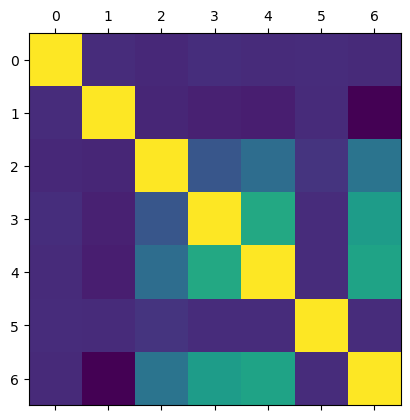

In [29]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

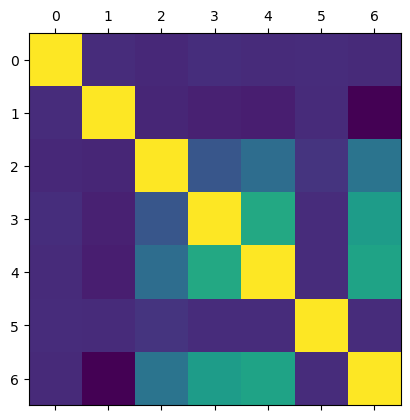

In [30]:
# Save figure
plt.matshow(sub.corr())
plt.savefig("out_2.png") 

# This will save the image in the working directory. 
# the next line shows the directory

In [31]:
#current dir
cwd = os.getcwd()
cwd

'/Users/nancykray/Desktop/Real Estate Project/Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

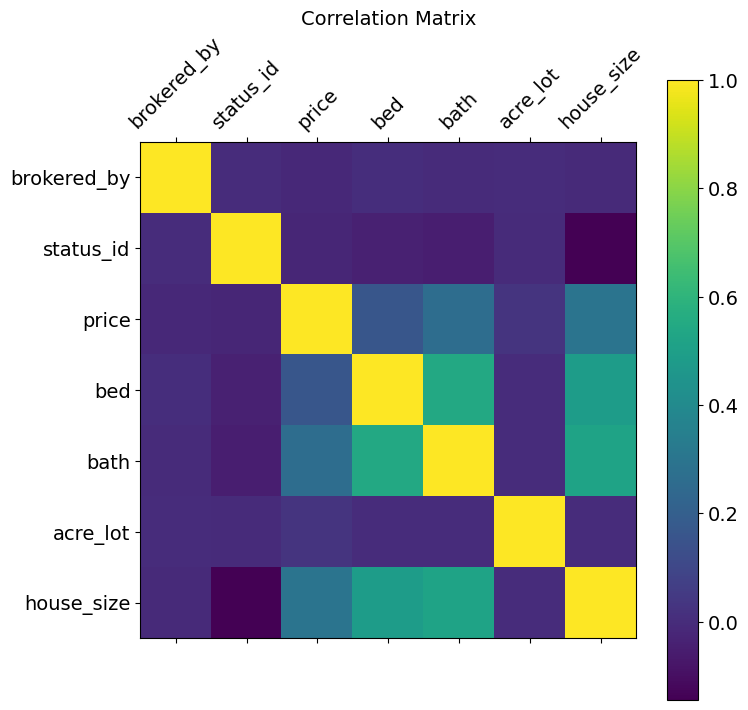

In [32]:
# Add labels, a legend, and change the size of the heatmap (remember that 'df' is now 'sub')

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

this forces you to constantly cross reference the colors in the chart with the legend, leaving the exact correlation coefficients effectively obscure. In order to best interpret the data, let's use a heatmap below:

#### Create a correlation heatmap using seaborn:

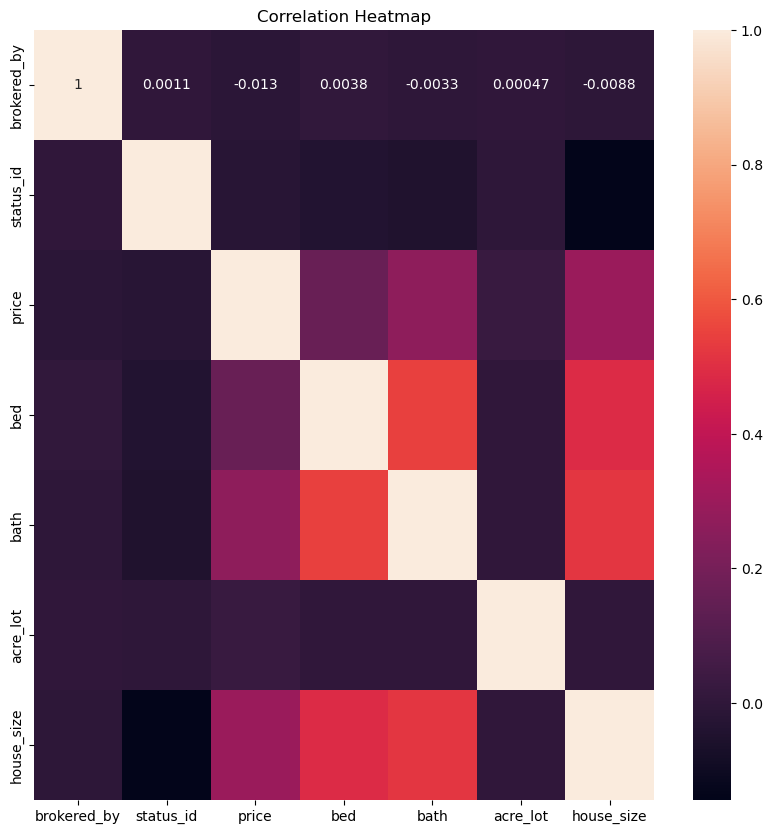

In [33]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# Add a title
plt.title('Correlation Heatmap')

# Save the heatmap to a file
plt.savefig('correlation_heatmap.png')

This correlation heatmap shows that strongest relationships are highlighted in orange/red (as this is the lightest color shown besides white and white does not count as these are perfect 1s due to variables crossing paths with themselves) 

These stronger relationships are between number of 'bath' and 'bed', 'house_size' and 'bed', 'house_size' and 'bath'.  

Slightly weaker (but positive) correlations are ''bath' and 'price', and 'house_size' and 'price'

Weaker yet is 'bed' and 'price'

### Scatterplots

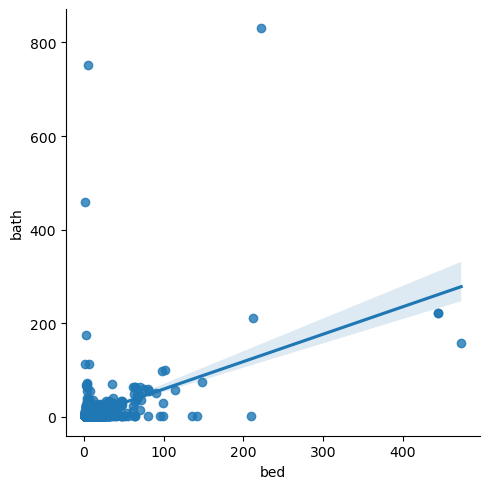

In [85]:
# Create a scatterplot for the "bed" and "bath" columns in seaborn (since these have strongest correlation)

sns.lmplot(x = 'bed', y = 'bath', data = df)

This scatterplot shows the linear trend of a positive correlation between number of bedrooms and number of bathrooms.  There are a few outliers in this dataset shown here as well.

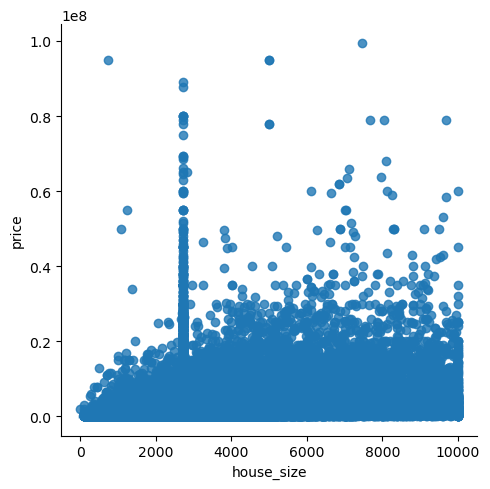

In [27]:
#create a scatterplot for the 'house_size' and 'price' columns in seaborn
sns.lmplot(x = 'house_size', y = 'price', data = df)

# Save the plot
plt.savefig('scatter_plot_house_size_price.png', dpi=300, bbox_inches='tight')


#### this scatterplot is the same as others I have seen in other tasks showing a trend at the 2500 sq ft, which is the standard size for a house.  This plot shows a positive correlation, but there are several outliers in price.

### Pair plots

In [88]:
# review the columns from 'sub' subset of dataframe to narrow down what I want to keep for the pair plots
sub.columns

Index(['brokered_by', 'status_id', 'price', 'bed', 'bath', 'acre_lot',
       'house_size'],
      dtype='object')

In [89]:
# Keep only the variables you want to use in the pair plot (create another subset dataframe)
# this time I left out acre_lot since there was clearly no realtionship with acre_lot and price

sub_2 = sub[['price', 'bed', 'bath', 'house_size']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

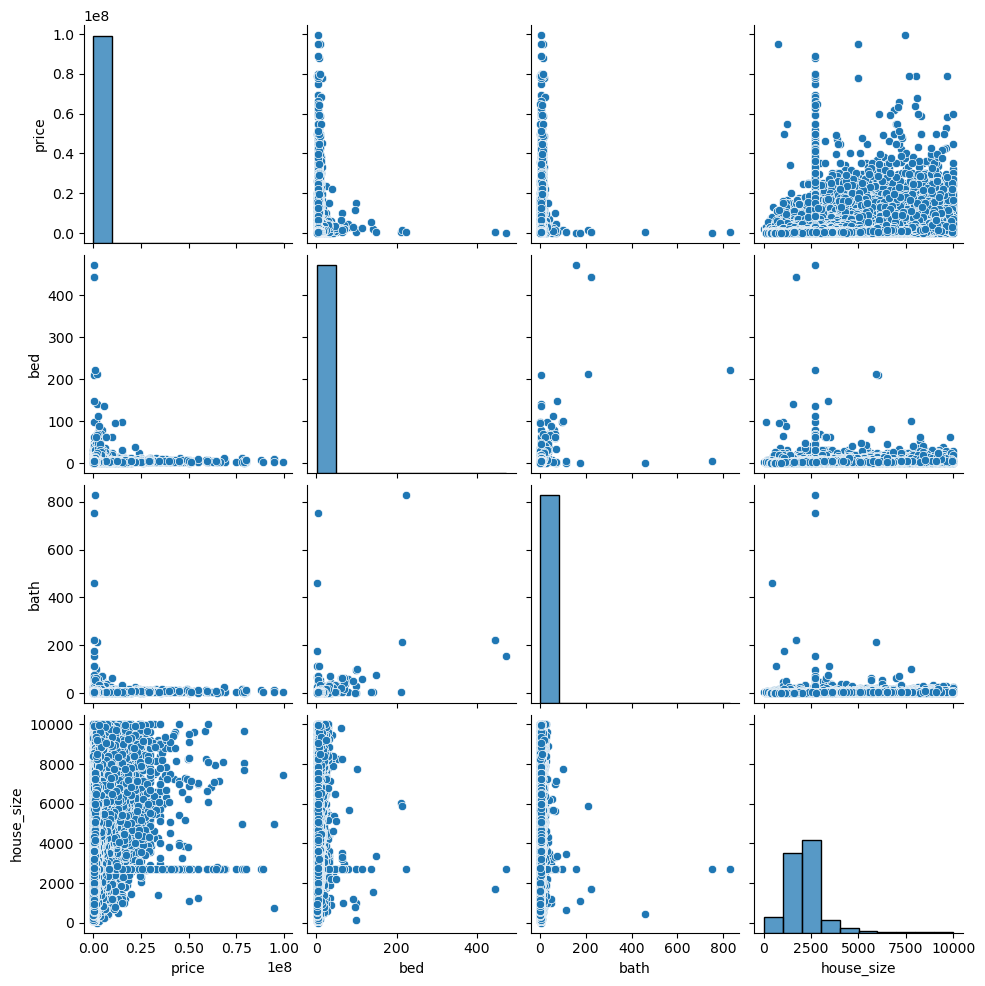

In [90]:
# Create a pair plot (modify bin# - otherwise not executing)
sns.pairplot(sub_2, diag_kws = {'bins': 10})

### Categorical Plots:

##### Creating a categorical variable that splits the "price" column into categories

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

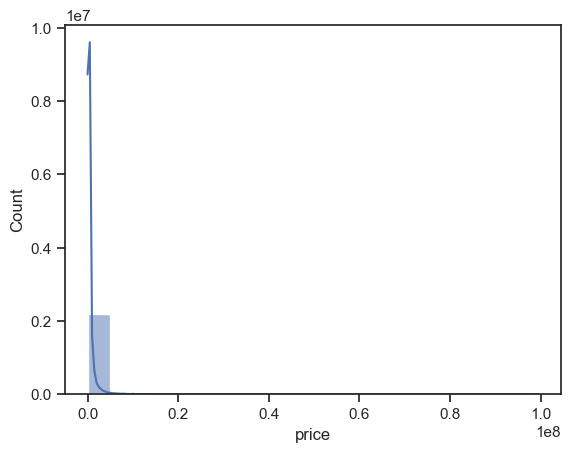

In [25]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(sub['price'], bins = 20, kde = True)

In [26]:
#look at numbers to see the range
sub.describe()

,brokered_by,status_id,price,bed,bath,acre_lot,house_size
count,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06
mean,5.294047e+04,1.740428e+00,5.082119e+05,3.264167e+00,2.483447e+00,1.293017e+01,2.183073e+03
std,3.064389e+04,9.599122e-01,1.014483e+06,1.253284e+00,1.347902e+00,7.025720e+02,9.704102e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,4.000000e+00
25%,2.386500e+04,1.000000e+00,1.650000e+05,3.000000e+00,2.000000e+00,1.700000e-01,1.454000e+03
50%,5.288400e+04,1.000000e+00,3.250000e+05,3.000000e+00,2.496373e+00,2.600000e-01,2.156000e+03
75%,7.918400e+04,3.000000e+00,5.499990e+05,4.000000e+00,3.000000e+00,6.800000e-01,2.715133e+03
max,1.101420e+05,3.000000e+00,9.950000e+07,4.730000e+02,8.300000e+02,1.000000e+05,1.000000e+04


In [27]:
#check the median since there is such a concentration in the lower range
sub['price'].median()

325000.0

In [28]:
#check the max to set the parameters
sub['price'].max()

99500000.0

In [29]:
#check the min 
sub['price'].min()

1.0

In [30]:
sub.loc[df['price'] < 299999, 'Price category'] = 'Low price' # below 299,999 dollars

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_7716/1174982812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[df['price'] < 299999, 'Price category'] = 'Low price' # below 299,999 dollars


In [31]:
sub.loc[(df['price'] >= 300000) & (df['price'] <1000000), 'Price category'] = 'Middle price' #300,000 to 1 million

In [32]:
sub.loc[df['price'] >= 1000000.0, 'Price category'] = 'High price' # 1 milliond dollars is pretty high!

In [33]:
sub['Price category'].value_counts(dropna = False)

Price category
Low price       1032600
Middle price     990055
High price       189740
nan                1334
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


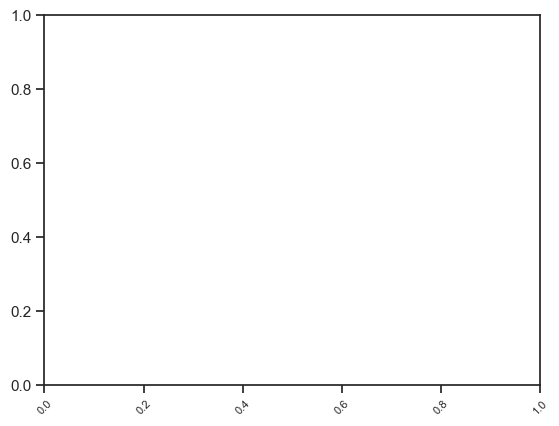

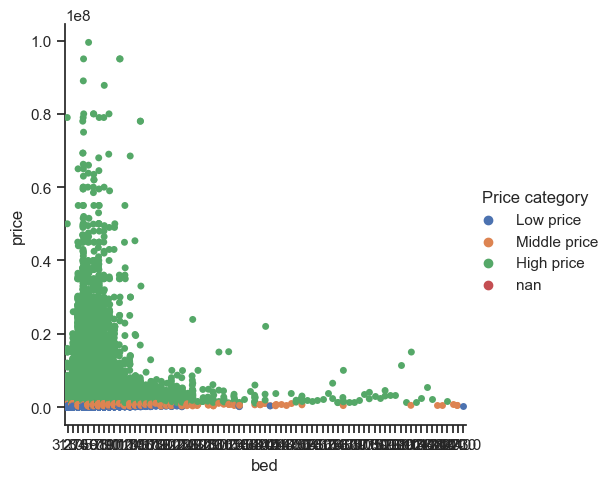

In [35]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style='ticks')

plt.xticks(rotation=45, fontsize=8) #rotates the x-axis tick labels by 45 degrees and sets the font size to 8.
g = sns.catplot(x='bed', y='price', hue='Price category', data=sub)



In [36]:
# fig = g.get_figure
g.savefig('cat_plot_bed_price3.png')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


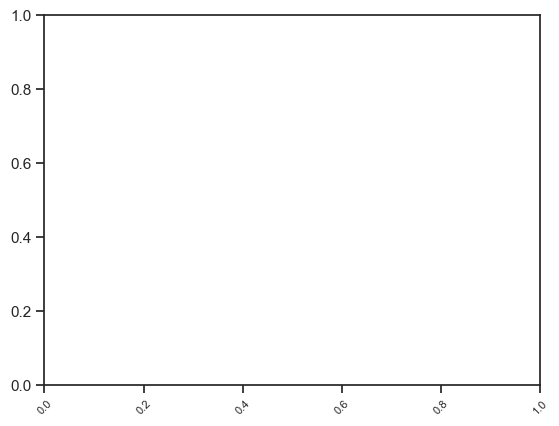

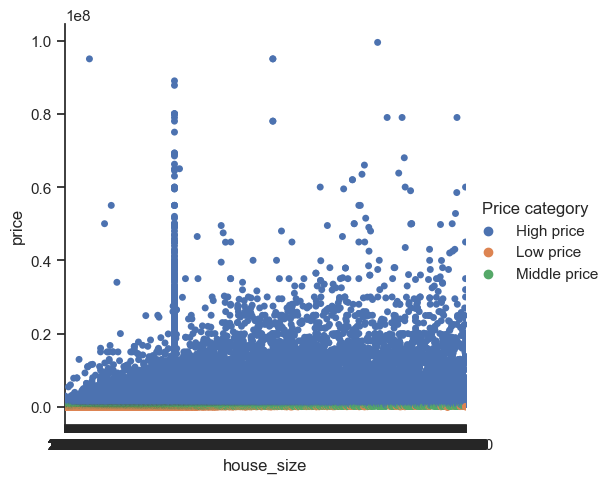

In [38]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style='ticks')
plt.xticks(rotation=45, fontsize=8) #rotates the x-axis tick labels by 45 degrees and sets the font size to 8.
g = sns.catplot(x='house_size', y='price', hue='Price category', data=df)


In [39]:
# fig = g.get_figure
g.savefig('cat_plot_house_size_price3.png')

In [109]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size,status_id
count,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06
mean,5.294047e+04,5.082119e+05,3.264167e+00,2.483447e+00,1.293017e+01,1.012618e+06,5.219676e+04,2.183073e+03,1.740428e+00
std,3.064389e+04,1.014483e+06,1.253284e+00,1.347902e+00,7.025720e+02,5.823856e+05,2.895156e+04,9.704102e+02,9.599122e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,6.010000e+02,4.000000e+00,1.000000e+00
25%,2.386500e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.700000e-01,5.090910e+05,2.962000e+04,1.454000e+03,1.000000e+00
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.496373e+00,2.600000e-01,1.012986e+06,4.843300e+04,2.156000e+03,1.000000e+00
75%,7.918400e+04,5.499990e+05,4.000000e+00,3.000000e+00,6.800000e-01,1.519010e+06,7.806400e+04,2.715133e+03,3.000000e+00
max,1.101420e+05,9.950000e+07,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.000000e+04,3.000000e+00


In [115]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category,status_id,new_build
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Low price,1,new_build
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price,1,new_build
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price,1,new_build
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Low price,1,new_build
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price,1,new_build


## Export adjusted data set

In [116]:
df.to_pickle(os.path.join(path,'Prepared Data', 'df_clean8.pkl'))